# Сбор данных о квартирах в Москве на 2019 год

# Цель проекта: проанализировать параметры квартир с помощью библиотеки matplotlib, и сделать несколько выводов.

In [12]:
from collections import Counter
from collections import defaultdict

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

'''
Подключение необходимых библиотек
'''

In [13]:
r = pd.read_csv('flats_moscow.csv')
print(r) 

'''
Представляю данные, которые скачал с Kaggle
'''

      price  square  livesp  kitsp  dist  metrdist  walk  brick  floor  \
1        81      58      40    6.0  12.5         7     1      1      1   
2        75      44      28    6.0  13.5         7     1      0      1   
3       128      70      42    6.0  14.5         3     1      1      1   
4        95      61      37    6.0  13.5         7     1      0      1   
5       330     104      60   11.0  10.5         7     0      1      1   
...     ...     ...     ...    ...   ...       ...   ...    ...    ...   
2036    110      77      45   10.0  12.0         5     0      0      1   
2037     95      60      43    6.0   9.0         5     0      0      1   
2038     95      60      46    5.0  10.5         5     1      0      1   
2039    129      76      48   10.0  12.5         5     0      0      1   
2040    103      64      45    7.0  15.5         5     1      0      1   

      territory  
1             3  
2             6  
3             3  
4             1  
5             3  
...

## Обработка на ошибки в данных

In [3]:
print(r.isnull().sum())

price        0
square       0
livesp       0
kitsp        0
dist         0
metrdist     0
walk         0
brick        0
floor        0
territory    0
dtype: int64


# Алгоритм моего анализа с графиками:

## Cтрою общий график по метрике, откладывая по оси Y кол-во квартир.
## Распределяю данные по своим благоприятным диапозонам.
## Далее настраиваю график и столбцы в нём.
## Примерно в такой же последовательности действую с другими метриками.

# График с ценником квартир

In [3]:
price = r['price']
print(price.describe())

'''
Беру колонку с ценой из главной таблицы
'''

count    2040.000000
mean      127.496569
std        51.878220
min        50.000000
25%        95.000000
50%       115.000000
75%       142.000000
max       730.000000
Name: price, dtype: float64


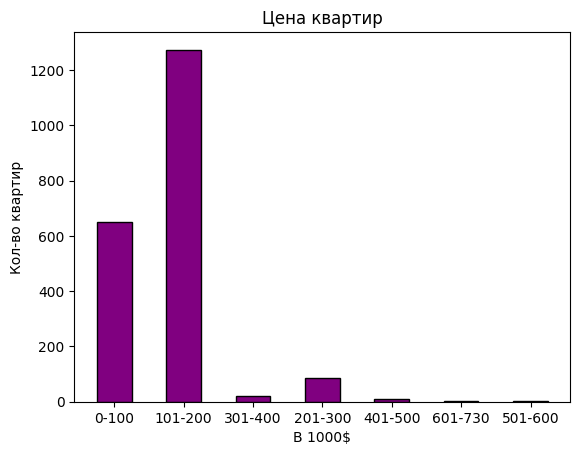

In [6]:
histogram = defaultdict(int)
for pr in price:
    if 0 <= pr <=100:
        histogram['0-100'] += 1
    elif 101 <= pr <= 200:
        histogram['101-200'] += 1
    elif 201 <= pr <= 300:
        histogram['201-300'] += 1
    elif 301 <= pr <= 400:
        histogram['301-400'] += 1
    elif 401 <= pr <= 500:
        histogram['401-500'] += 1
    elif 501 <= pr <= 600:
        histogram['501-600'] += 1
    elif 601 <= pr <= 730:
        histogram['601-730'] += 1
plt.bar(histogram.keys(), histogram.values(), 0.5, edgecolor = (0, 0, 0), color = 'purple')
plt.title('Цена квартир')
plt.ylabel('Кол-во квартир')
plt.xlabel('В 1000$')
plt.show()

# График общей площади

In [5]:
totsp = r['square']
print(totsp.describe())

count    2040.000000
mean       73.084314
std        15.123450
min        44.000000
25%        62.000000
50%        73.500000
75%        79.000000
max       192.000000
Name: square, dtype: float64


{58: 68, 70: 33, 61: 40, 104: 4, 76: 73, 59: 48, 55: 41, 80: 103, 86: 24, 96: 8, 77: 104, 63: 49, 66: 57, 75: 110, 87: 11, 79: 56, 60: 126, 85: 34, 84: 26, 62: 22, 72: 48, 92: 11, 68: 49, 82: 26, 73: 32, 49: 4, 65: 78, 83: 37, 125: 3, 81: 38, 100: 15, 64: 77, 99: 6, 113: 5, 51: 28, 67: 35, 89: 3, 78: 87, 57: 45, 53: 16, 103: 4, 74: 81, 120: 3, 56: 48, 95: 9, 106: 6, 50: 10, 105: 7, 69: 21, 101: 6, 110: 5, 108: 7, 71: 14, 54: 21, 52: 9, 90: 25, 88: 7, 121: 3, 112: 4, 134: 4, 94: 4, 107: 4, 93: 7, 109: 3, 119: 5, 98: 4, 111: 3, 102: 5, 91: 3}


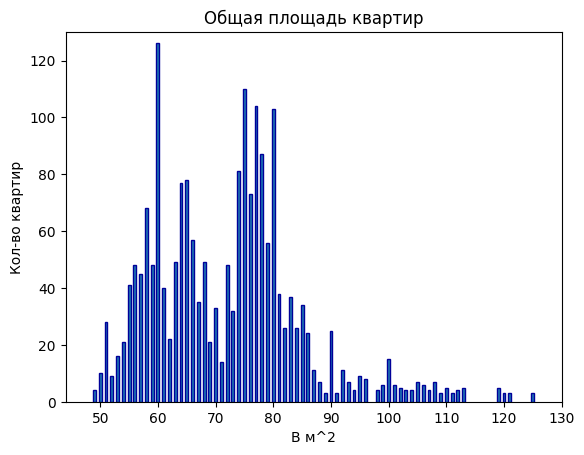

In [31]:
histogram = Counter(totsp)
histogram_1 = {key:value for key, value in histogram.items() if value > 2}
print(histogram_1) # Вывожу словарь, где ключ - площадь квартиры, а значение - количество квартир
plt.bar(histogram_1.keys(), histogram_1.values(), 0.5, edgecolor=(0,0,0.6))
plt.axis([44, 130, 0, 130])
plt.title('Общая площадь квартир')
plt.xlabel('В м^2')
plt.ylabel('Кол-во квартир')
plt.show()

## Центрирование данных

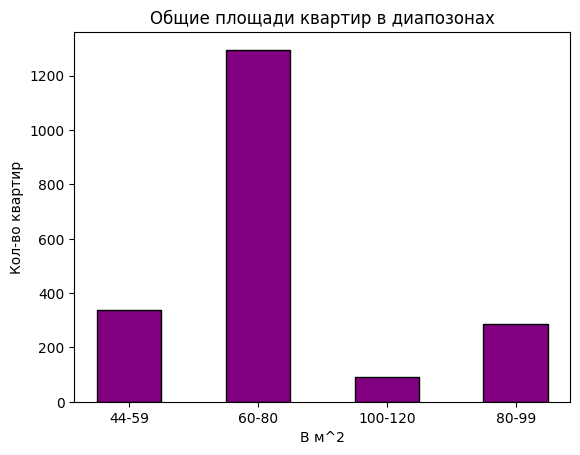

In [3]:
middle = defaultdict(int)
for key in r['square']:
    if 44 <= key < 60:
        middle['44-59'] += 1
    elif 60 <= key <= 80:
        middle['60-80'] += 1
    elif 80 <= key < 100:
        middle['80-99'] += 1
    elif 100 <= key <= 120:
        middle['100-120'] += 1
plt.bar(middle.keys(), middle.values(), 0.5, edgecolor=(0,0,0), color='purple')
plt.title('Общие площади квартир в диапозонах')
plt.xlabel('В м^2')
plt.ylabel('Кол-во квартир')
plt.show()

# График жилой площади

In [6]:
live = r['livesp']
print(live.describe())

count    2040.000000
mean       46.337255
std         7.894348
min        28.000000
25%        42.000000
50%        45.000000
75%        50.000000
max       102.000000
Name: livesp, dtype: float64


{40: 91, 42: 94, 37: 38, 60: 22, 50: 68, 39: 67, 36: 24, 56: 24, 51: 54, 47: 76, 44: 206, 43: 159, 58: 20, 54: 51, 55: 31, 38: 79, 61: 7, 46: 149, 52: 57, 34: 49, 80: 6, 41: 53, 33: 7, 45: 295, 49: 26, 48: 77, 66: 8, 72: 3, 35: 29, 70: 9, 75: 5, 53: 59, 62: 10, 74: 3, 68: 5, 65: 7, 57: 18, 63: 7, 71: 5, 64: 8, 67: 4, 59: 8, 32: 4}


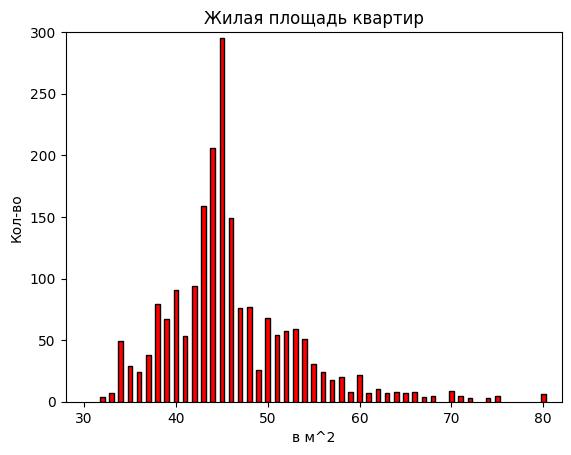

In [7]:
histogram = Counter(live)
histogram_1 = {key:value for key, value in histogram.items() if value > 2}
print(histogram_1)
plt.bar(histogram_1.keys(), histogram_1.values(), 0.5, color='red', edgecolor=(0,0,0))
plt.axis([28, 82, 0, 300])
plt.title('Жилая площадь квартир')
plt.xlabel('в м^2')
plt.ylabel('Кол-во квартир')
plt.show()

# Жилая площадь в диапозонах

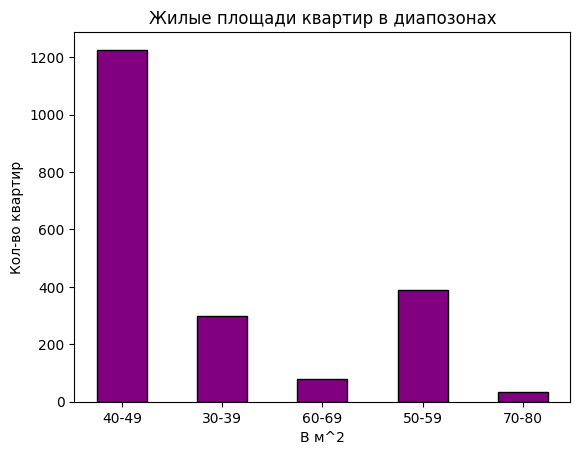

In [8]:
middle = defaultdict(int)
for key in live:
    if 30 <= key < 40:
        middle['30-39'] += 1
    elif 40 <= key < 50:
        middle['40-49'] += 1
    elif 50 <= key < 60:
        middle['50-59'] += 1
    elif 60 <= key < 70:
        middle['60-69'] += 1
    elif 70 <= key <= 80:
        middle['70-80'] += 1
plt.bar(middle.keys(), middle.values(), 0.5, edgecolor=(0,0,0), color='purple')
plt.title('Жилые площади квартир в диапозонах')
plt.xlabel('В м^2')
plt.ylabel('Кол-во квартир')
plt.show()

# График площади кухни

In [18]:
kitsp = r['kitsp']
print(kitsp.describe())

count    2040.000000
mean        8.898529
std         2.787073
min         5.000000
25%         7.000000
50%         9.000000
75%        10.000000
max        25.000000
Name: kitsp, dtype: float64


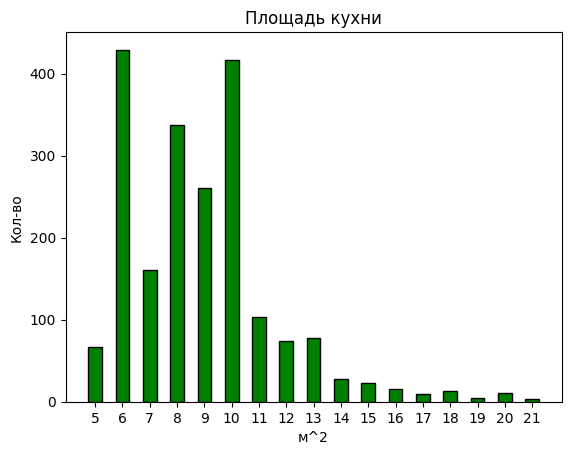

In [21]:
hist = Counter(kitsp)
histogram = {key:value for key, value in hist.items() if value > 2}
plt.bar(histogram.keys(), histogram.values(), 0.5, edgecolor=(0,0,0), color='green')
plt.title('Площадь кухни')
plt.xticks([i for i in range(5, 22)])
plt.xlabel('м^2')
plt.ylabel('Кол-во квартир')
plt.show()

# Кухня в диапозонах

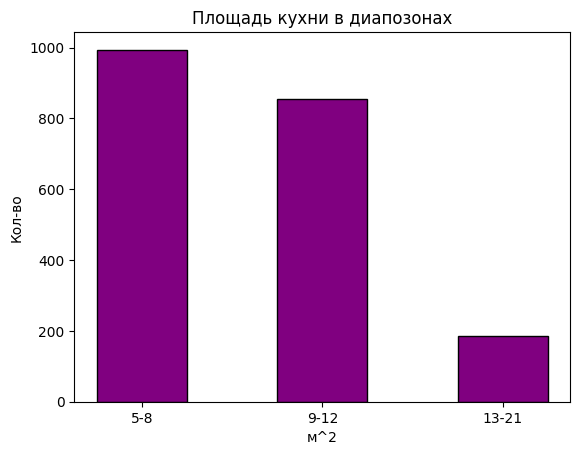

In [22]:
middle = defaultdict(int)
for key in kitsp:
    if 5 <= key <= 8:
        middle['5-8'] += 1
    elif 9 <= key <= 12:
        middle['9-12'] += 1
    elif 13 <= key <= 21:
        middle['13-21'] += 1
plt.bar(middle.keys(), middle.values(), 0.5, edgecolor=(0,0,0), color='purple')
plt.title('Площадь кухни в диапозонах')
plt.xlabel('м^2')
plt.ylabel('Кол-во квартир')
plt.show()

# Расстояние от квартиры до центра Москвы

In [4]:
dist = r['dist']
print(dist.describe())

count    2040.000000
mean       11.015686
std         3.375539
min         3.000000
25%         9.000000
50%        12.000000
75%        13.500000
max        17.000000
Name: dist, dtype: float64


{12.5: 127, 13.5: 199, 14.5: 156, 10.5: 138, 11.0: 46, 7.5: 82, 9.0: 146, 12.7: 85, 3.5: 43, 12.0: 320, 4.5: 46, 6.0: 43, 3.0: 54, 7.0: 88, 10.0: 46, 13.0: 102, 15.5: 59, 8.0: 43, 17.0: 100, 6.5: 39, 11.5: 54, 5.0: 24}


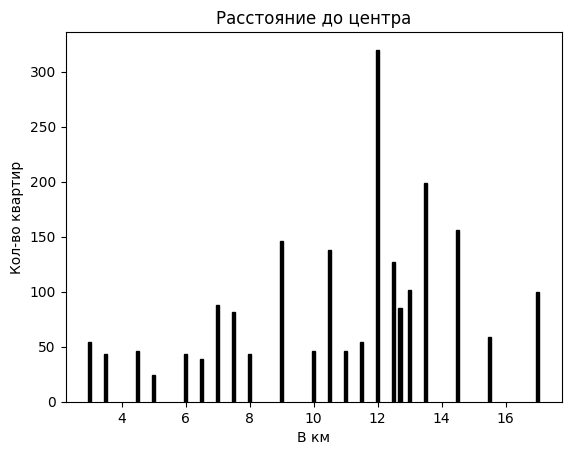

In [6]:
hist = Counter(dist)
histogram = {key:value for key, value in hist.items()}
print(histogram)
plt.bar(histogram.keys(), histogram.values(), 0.1, edgecolor=(0,0,0), color='black')
plt.title('Расстояние до центра')
plt.xlabel('В км')
plt.ylabel('Кол-во квартир')
plt.show()

# В диапозонах

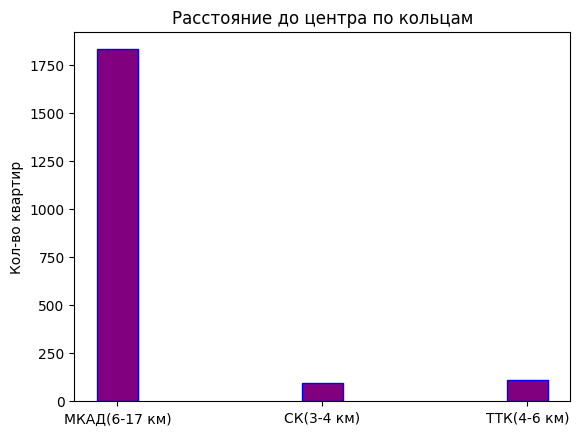

In [33]:
middle = defaultdict(int)
for key in dist:
    if 3 <= key <= 4:
        middle['СК(3-4 км)'] += 1
    elif 4 < key <= 6:
        middle['ТТК(4-6 км)'] += 1
    elif 6 < key <= 17:
        middle['МКАД(6-17 км)'] += 1
plt.bar(middle.keys(), middle.values(), 0.2, edgecolor=(0,0,1), color='purple')
plt.title('Расстояние до центра по кольцам')
plt.ylabel('Кол-во квартир')
plt.show()

# Время ходьбы до метро

In [7]:
dist = r[['metrdist', 'walk']]
print(dist)

      metrdist  walk
1            7     1
2            7     1
3            3     1
4            7     1
5            7     0
...        ...   ...
2036         5     0
2037         5     0
2038         5     1
2039         5     0
2040         5     1

[2040 rows x 2 columns]


In [8]:
dist = dist.reset_index()
walk = []
for index, row in dist.iterrows():
    if row['walk'] == 1:
        walk.append(row['metrdist'])

Counter({10: 434, 5: 308, 15: 191, 7: 188, 3: 116, 2: 63, 1: 39, 12: 30, 8: 12, 4: 8, 20: 6, 6: 3, 9: 1})


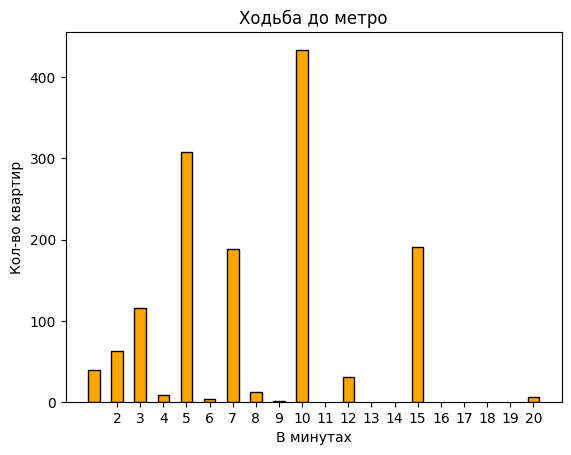

In [5]:
hist = Counter(walk)
print(hist)
plt.bar(hist.keys(), hist.values(), 0.5, edgecolor=(0,0,0), color='orange')
plt.title('Ходьба до метро')
plt.xlabel('В минутах')
plt.xticks([i for i in range(2, 21)])
plt.ylabel('Кол-во квартир')
plt.show()

# Время поездки до метро

In [9]:
dist = dist.reset_index()
drive = []
for index, row in dist.iterrows():
    if row['walk'] == 0:
        drive.append(row['metrdist'])

Counter({10: 235, 5: 209, 7: 105, 15: 61, 20: 6, 12: 6, 8: 4, 4: 3, 6: 3, 9: 3, 3: 3, 2: 2, 11: 1})


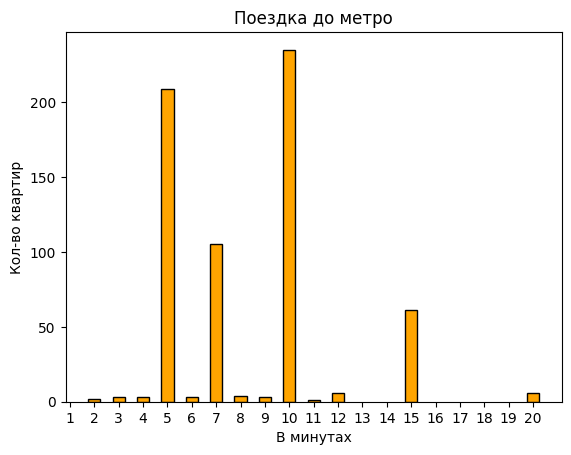

In [10]:
hist = Counter(drive)
print(hist)
plt.bar(hist.keys(), hist.values(), 0.5, edgecolor=(0,0,0), color='orange')
plt.title('Поездка до метро')
plt.xlabel('В минутах')
plt.xticks([i for i in range(1, 21)])
plt.ylabel('Кол-во квартир')
plt.show()

# Кирпичный или не кирпичный дом

In [3]:
brick = r['brick']
print(brick)

1       1
2       0
3       1
4       0
5       1
       ..
2036    0
2037    0
2038    0
2039    0
2040    0
Name: brick, Length: 2040, dtype: int64


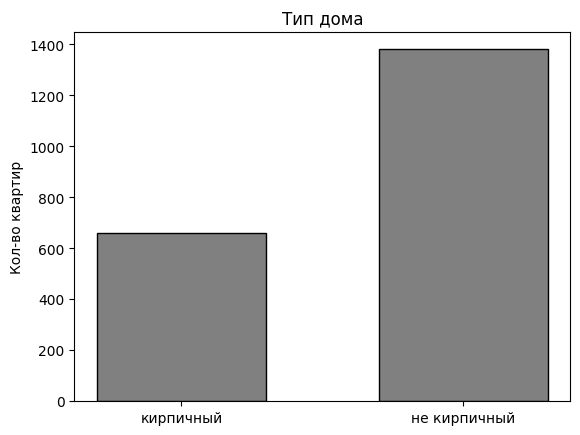

In [7]:
hist = defaultdict(int)
for key in brick:
    if key == 1:
        hist['кирпичный'] += 1
    else:
        hist['не кирпичный'] += 1
plt.bar(hist.keys(), hist.values(), 0.6, edgecolor=(0,0,0), color='grey')
plt.title('Тип дома')
plt.ylabel('Кол-во квартир')
plt.show()

# Этажы

In [8]:
floor = r['floor']
print(floor)

1       1
2       1
3       1
4       1
5       1
       ..
2036    1
2037    1
2038    1
2039    1
2040    1
Name: floor, Length: 2040, dtype: int64


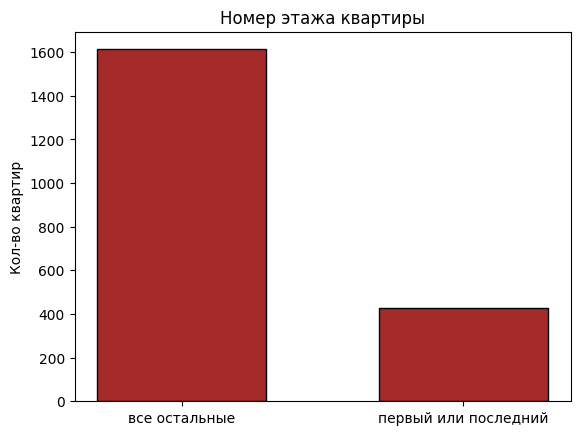

In [10]:
hist = defaultdict(int)
for key in floor:
    if key == 1:
        hist['все остальные'] += 1
    else:
        hist['первый или последний'] += 1
plt.bar(hist.keys(), hist.values(), 0.6, edgecolor=(0,0,0), color='brown')
plt.title('Номер этажа квартиры')
plt.ylabel('Кол-во квартир')
plt.show()

# Территориальное местоположение квартиры

###   В данном разделе я покажу на гистограмме к какому именно району, из 8 имеющихся, относится квартира:        
### 1. Север, вокруг Калужско-Рижской линии метрополитена

### 2. Север, вокруг Серпуховско-Тимирязевской линии метрополитена;  

### 3. Северо-запад, вокруг Замоскворецкой линии метрополитена;  

### 4. Северо-запад, вокруг Таганско-Краснопресненской линии метрополитена;  

### 5. Юго-восток, вокруг Люблинской линии метрополитена;

### 6. Юго-восток, вокруг Таганско-Краснопресненской линии метрополитена;

### 7. Восток, вокруг Калиниской линии метрополитена; 

### 8. Восток, вокруг Арбатско-Покровской линии метрополитена.

In [11]:
territory = r['territory']
print(territory)

1       3
2       6
3       3
4       1
5       3
       ..
2036    5
2037    4
2038    7
2039    3
2040    1
Name: territory, Length: 2040, dtype: int64


Counter({3: 345, 5: 336, 1: 272, 6: 257, 7: 226, 2: 215, 4: 209, 8: 180})


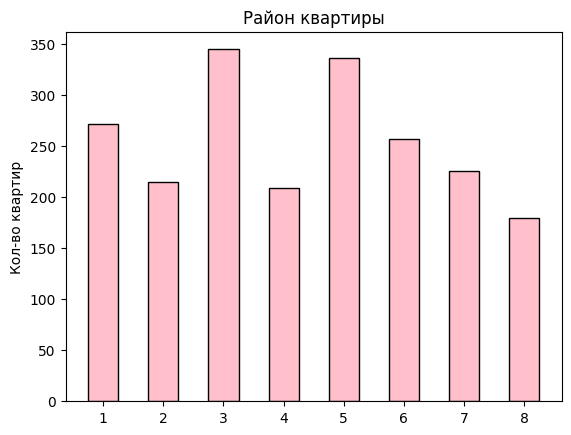

In [18]:
place = Counter(territory)
print(place)
plt.bar(place.keys(), place.values(), 0.5, edgecolor=(0,0,0), color='pink')
plt.title('Район квартиры')
plt.ylabel('Кол-во квартир')
plt.show()

# Корреляция цены и расстояния до центра

-0.3315626331986709


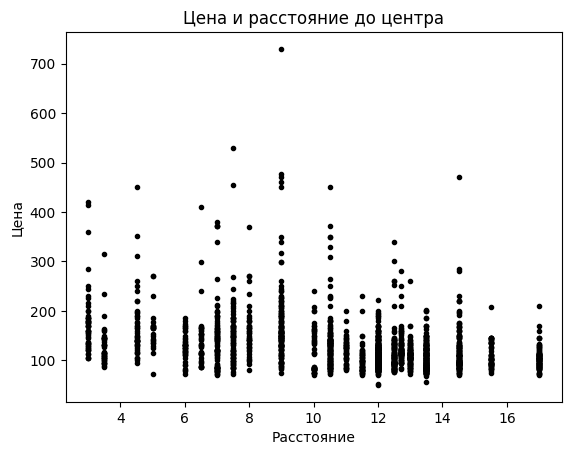

In [10]:
dist = r['dist']
correlation = dist.corr(price)
print(correlation)
plt.scatter(dist, price, marker='.', color='black')
plt.xlabel('Расстояние')
plt.ylabel('Цена')
plt.title('Цена и расстояние до центра')
plt.show()

### Из вычисления корреляции можно заключить, что чем выше цена квартиры, тем меньше будет становиться расстояние до центра, так как у нас получилась слабая отрицательная корреляция.

### А из графика видно, что с увеличением расстояния количество точек в верхней части графика постепенно исчезает, тем самым являясь доказательством верности вычисленной корреляции.

# Корреляция ходьбы и поездки до метро

0    True
dtype: bool 0    True
dtype: bool
0    0.001269
dtype: float64


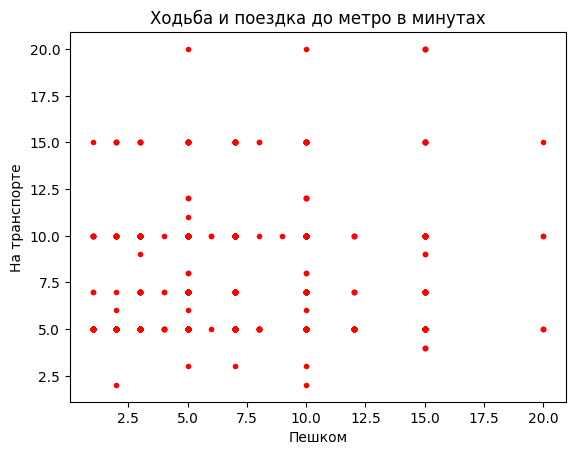

In [25]:
walk = pd.DataFrame(walk)
drive = pd.DataFrame(drive)
max_length = max(len(walk), len(drive))
walk = walk.reindex(range(max_length)).fillna(method='ffill')
drive = drive.reindex(range(max_length)).fillna(method='ffill').astype(int)
print(walk.all(), drive.all())
correlation = walk.corrwith(drive)
print(correlation)
plt.scatter(walk, drive, marker='.', color='red')
plt.xlabel('Пешком')
plt.ylabel('На транспорте')
plt.title('Ходьба и поездка до метро в минутах')
plt.show()

### Посчитанная корреляция указывает на то, что между метриками почти нет связи, так как корреляция приблизительно равна 0.

# Построение корреляционной матрицы

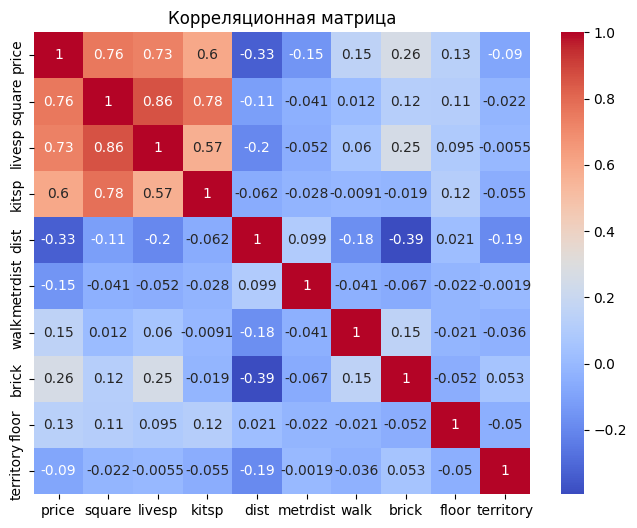

In [14]:
correlation_matrix = r.corr()
plt.figure(figsize=(8, 6))  # Размер графика
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

### Какие выводы можно сделать, глядя на эту матрицу:

### 1) Цена квартиры, площадь, общая площадь и площадь кухни хорошо коррелируют друг с другом. Чем больша одна из этих метрик, тем больше и другая. Например, чем больше цена квартиры, тем, соответственно, больше и площадь квартиры.
### 2) Между кирпичным домом и расстоянием до центра города имеется связь (-0.39). Если мы рассматриваем кирпичный дом, то он скорее всего будет расположен вблизи центра. Как следствие, цена возрастает с появлением кирпичного дома, корреляция (0.26).
### 3) Выбранная территория ни с чем не коррелирует, кроме расстояния до центра (-0.19). Значит данные составлены в чуть большей степени из квартир на севере города, так как значения территории 1- 4 указывают на северную часть.